In [1]:

from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt

In [2]:
qc = QuantumCircuit(3, 3)

# Encode logical |1> state into 3 qubits
qc.x(0)           # Prepare |1> on qubit 0
qc.cx(0, 1)       # Copy state to qubit 1
qc.cx(0, 2)       # Copy state to qubit 2
qc.barrier(label='Encoding')

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(<Qubit register=(3, "q"), index=0>, <Qubit register=(3, "q"), index=1>, <Qubit register=(3, "q"), index=2>), clbits=())

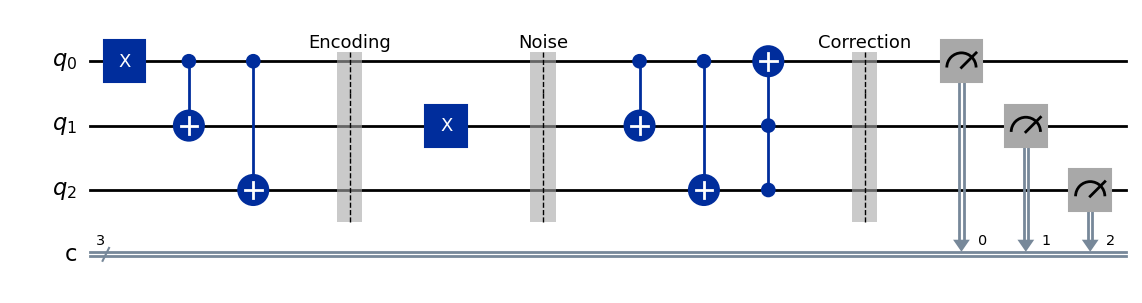

In [3]:
qc.x(1)  # Bit-flip on qubit 1
qc.barrier(label='Noise')

# ------------------------------------------------------------
# Step 3: Decode and Correct
# ------------------------------------------------------------
qc.cx(0, 1)
qc.cx(0, 2)
qc.ccx(1, 2, 0)
qc.barrier(label='Correction')

# ------------------------------------------------------------
# Step 4: Measure all qubits
# ------------------------------------------------------------
qc.measure([0, 1, 2], [0, 1, 2])
qc.draw('mpl')

In [4]:
# ------------------------------------------------------------
# Step 5: Create depolarizing noise model (Fixed)
# ------------------------------------------------------------

from qiskit_aer.noise import NoiseModel, depolarizing_error

noise = NoiseModel()

# Define errors by gate size
error_1 = depolarizing_error(0.02, 1)   # single-qubit gates
error_2 = depolarizing_error(0.04, 2)   # two-qubit gates
error_3 = depolarizing_error(0.06, 3)   # three-qubit gates

# Add noise to all gates
noise.add_all_qubit_quantum_error(error_1, ['x', 'h'])
noise.add_all_qubit_quantum_error(error_2, ['cx'])
noise.add_all_qubit_quantum_error(error_3, ['ccx'])


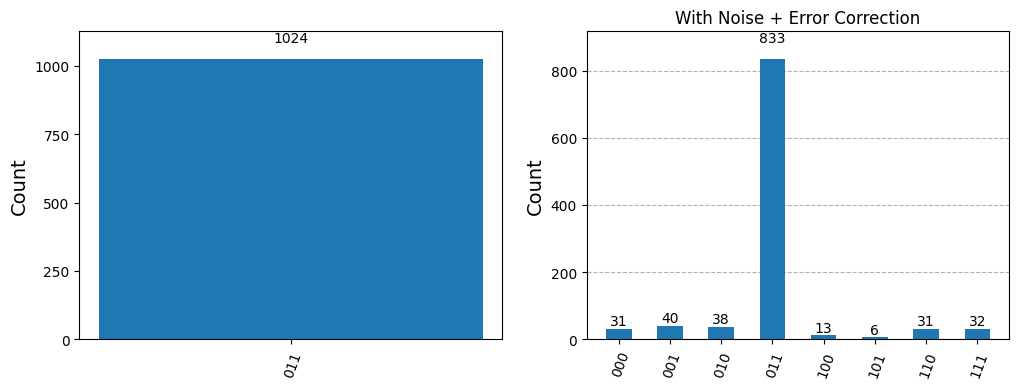

Ideal counts: {'011': 1024}
Noisy counts (with correction): {'011': 833, '111': 32, '110': 31, '100': 13, '000': 31, '010': 38, '001': 40, '101': 6}


In [5]:
backend = Aer.get_backend('aer_simulator')

# Run without noise (ideal)
compiled_ideal = transpile(qc, backend)
job_ideal = backend.run(compiled_ideal, shots=1024)
result_ideal = job_ideal.result().get_counts()

# Run with noise
compiled_noisy = transpile(qc, backend)
job_noisy = backend.run(compiled_noisy, shots=1024, noise_model=noise)
result_noisy = job_noisy.result().get_counts()

# Plot comparison
fig, ax = plt.subplots(1, 2, figsize=(12,4))
plot_histogram(result_ideal, title="Without Noise (Ideal)", ax=ax[0])
plot_histogram(result_noisy, title="With Noise + Error Correction", ax=ax[1])
plt.show()

print("Ideal counts:", result_ideal)
print("Noisy counts (with correction):", result_noisy)
